In [1]:
import sympy as sp
sp.init_printing(use_latex="mathjax")

Digite quantas dimensões tem o domínio da função:

In [2]:
n = 2

In [3]:
x = sp.symbols('x:'+ str(n))

Digite a função usando x[i] para cada coordenada i de um elemento x do domínio:

In [4]:
expression = 2*x[0]**2 + 2*x[1]**2 -24*x[0] -24*x[1] +2*x[0]*x[1]

    2                         2        
2⋅x₀  + 2⋅x₀⋅x₁ - 24⋅x₀ + 2⋅x₁  - 24⋅x₁

Gráfico da função:


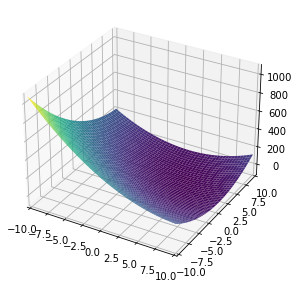

In [5]:
display (expression)
print("Gráfico da função:")

if n==1:
    sp.plot(expression, show=True)
elif n==2:
    sp.plotting.plot3d(expression, show=True)

Calculando o gradiente da função:

In [6]:
grad = []
for i in range (0,len(x)):
    grad.append(sp.diff(expression, x[i]))
    
display (grad)

[4⋅x₀ + 2⋅x₁ - 24, 2⋅x₀ + 4⋅x₁ - 24]

Método da Descida do Gradiente:

In [7]:
from copy import copy
# Funções para facilitar:

# Aplicar ponto numa função vetorial e retornar o vetor
def point_in_func (func: list, symbols: list, point: list):
    func_in_point = copy(func)
    for i in range(0, len(func_in_point)):
        for j in range (0, len(symbols)):
            func_in_point[i] = func_in_point[i].subs(symbols[j], point[j])
            
    return func_in_point

# Retornar novo vetor Xn
def get_new_Xn (Xn: list, alpha, grad_Xn: list):
    new_Xn = []
    for i in range (0, len(Xn)):
        new_Xn.append( Xn[i] - alpha*grad_Xn[i] )
    return new_Xn

# Retornar o produto escalar de dois vetores
def dot_product (v1: list, v2: list):
    result = 0.0
    
    if len(v1) == len (v2):
        for i in range (0, len(v1)):
            result += v1[i]*v2[i]
    
    return result

# Retornar a norma ao quadrado de um vetor
def squared_norm (Xn: list):
    return dot_product(Xn, Xn)

# Retornar o vetor v1-v2
def vec_sub (v1: list, v2: list):
    result = []
    if (len(v1) == len (v2)):
        for i in range (0, len(v1)):
            result.append(v1[i]-v2[i])
    
    return result

# Adição para salvar os pontos e plotá-los:
plot_points_x = []
plot_points_y = []
plot_points_f = []

# Parâmetros:
c1 = 0.1 # Pequeno, menor que c2 e no intervalo aberto (0,1)
c2 = 0.9 # Grande, maior que c1 e no intervalo aberto (0,1)
base_alpha = 1 # Alpha resetará para este valor a cada novo passo
Xn = [0,0] # X começa com todas as coordenadas como 0
error = 10.0**(-4) # Taxa de erro aceita
iteration = 0 # Contador de iterações
iteration_max = 100 # Limite máximo de iterações


# O método em si:
print ("Alpha\tf(Xn)\t\t\tXn")
while True:
    
    # Calculamos a função e o gradiente em Xn
    func_Xn = point_in_func([expression], x, Xn)[0]
    grad_Xn = point_in_func(grad, x, Xn)
    
    # Calculamos a norma ao quadrado do gradiente em Xn
    sqnm_grad_Xn = squared_norm(grad_Xn)
    
    # Buscando um alpha que respeite as Condições de Wolfe
    alpha = base_alpha
    while True:
        
        # Calculamos o novo Xn (ou X(n+1)) de acordo com o alpha atual
        new_Xn = get_new_Xn(Xn, alpha, grad_Xn) 
        
        # Calculamos f( X(n+1) )
        func_new_Xn = point_in_func([expression], x, new_Xn)[0]
        
        # Testamos a primeira condição de Wolfe (Regra de Armijo)
        if not func_new_Xn <= func_Xn - c1*alpha*sqnm_grad_Xn:
            # Avançamos o valor de alpha
            alpha /= 2
            continue
        
        # Calculamos o gradiente em X(n+1)
        grad_new_Xn = point_in_func(grad, x, new_Xn)
        
        #'''
        # Testamos a segunda condição de Wolfe (Condição de Curvatura)
        if not dot_product(grad_Xn, grad_new_Xn) <= c2*sqnm_grad_Xn:
            # Avançamos o valor de alpha
            alpha /= 2
            continue
        #'''
        
        # Ao chegarmos aqui, alpha satisfaz as condições de Wolfe, logo, aceitamos X(n+1)
        Xn = new_Xn
        print(alpha, func_new_Xn, new_Xn, sep='\t')
        
        # Adição para plotagem:
        plot_points_x.append(new_Xn[0])
        plot_points_y.append(new_Xn[1])
        plot_points_f.append(func_new_Xn)
        
        break
    
    # Se atingimos a precisão desejada, paramos aqui
    if squared_norm(grad_new_Xn) < error**2:
        break
        
    # Se fizer iterações demais, para
    iteration+=1
    if iteration > iteration_max:
        print("Muitas iterações")
        break
    

print("Ponto mínimo aproximado Xn:")
print (Xn)

Alpha	f(Xn)			Xn
0.25	-72.0000000000000	[6.00000000000000, 6.00000000000000]
0.25	-90.0000000000000	[3.00000000000000, 3.00000000000000]
0.25	-94.5000000000000	[4.50000000000000, 4.50000000000000]
0.25	-95.6250000000000	[3.75000000000000, 3.75000000000000]
0.25	-95.9062500000000	[4.12500000000000, 4.12500000000000]
0.25	-95.9765625000000	[3.93750000000000, 3.93750000000000]
0.25	-95.9941406250000	[4.03125000000000, 4.03125000000000]
0.25	-95.9985351562500	[3.98437500000000, 3.98437500000000]
0.25	-95.9996337890625	[4.00781250000000, 4.00781250000000]
0.25	-95.9999084472656	[3.99609375000000, 3.99609375000000]
0.25	-95.9999771118164	[4.00195312500000, 4.00195312500000]
0.25	-95.9999942779541	[3.99902343750000, 3.99902343750000]
0.25	-95.9999985694885	[4.00048828125000, 4.00048828125000]
0.25	-95.9999996423721	[3.99975585937500, 3.99975585937500]
0.25	-95.9999999105930	[4.00012207031250, 4.00012207031250]
0.25	-95.9999999776483	[3.99993896484375, 3.99993896484375]
0.25	-95.9999999944121	

In [10]:
# Plotando os pontos para n = 2:
if n==2:
    # Para abrir uma janela do gráfico, descomente a linha abaixo:
    %matplotlib qt 

    from matplotlib import pyplot as plt
    import numpy as np

    fig = plt.figure()
    ax = fig.gca(projection='3d')


    # Plotando a superfície:
    lambda_func = sp.lambdify(x, expression, modules=['numpy'])
    x_func = np.linspace(2, 7, 1000)
    y_func = np.linspace(2, 7, 1000)
    X, Y = np.meshgrid(x_func, y_func)
    Z = lambda_func(X, Y)
    ax.plot_surface (X, Y, Z, cmap='viridis', edgecolor='none')


    # Plotando os pontos do método
    ax.plot (plot_points_x, plot_points_y, plot_points_f, color = 'r', marker = 'o')
    plt.show()